# SeismicArray Demo

This notebook demonstrates how to use the SeismicArray class for array-derived rotation (ADR) computation.


## 1. Load Libraries


In [1]:
import yaml

from obspy import UTCDateTime
from sixdegrees.seismicarray import seismicarray


## 2. Initialize SeismicArray

Now we can create a SeismicArray instance using our configuration.


In [2]:
# setup array instance
array = seismicarray('./config/array_config.yml')

# Show array configuration
array.show_array_info()


├── stations: ['PY.PFOIX', 'PY.BPH01', 'PY.BPH02', 'PY.BPH03', 'PY.BPH04', 'PY.BPH05', 'PY.BPH06', 'PY.BPH07', 'PY.BPH08', 'PY.BPH09', 'PY.BPH10', 'PY.BPH11', 'PY.BPH12', 'PY.BPH13']
├── reference_station: PY.PFOIX
├── channel_prefix: B
├── response_output: VEL
├── fdsn_clients: ['IRIS']
├── client_mapping
        │   ├── PY.PFOIX: IRIS
        │   ├── PY.BPH01: IRIS
        │   ├── PY.BPH02: IRIS
        │   ├── PY.BPH03: IRIS
        │   ├── PY.BPH04: IRIS
        │   ├── PY.BPH05: IRIS
        │   ├── PY.BPH06: IRIS
        │   ├── PY.BPH07: IRIS
        │   ├── PY.BPH08: IRIS
        │   ├── PY.BPH09: IRIS
        │   ├── PY.BPH10: IRIS
        │   ├── PY.BPH11: IRIS
        │   ├── PY.BPH12: IRIS
        │   └── PY.BPH13: IRIS
├── adr_parameters
        │   ├── vp: 6200.0
        │   ├── vs: 3700.0
        │   └── sigmau: 1e-09
├── station_coordinates
└── station_distances


## 3. Get Station Inventories

Fetch station metadata and compute inter-station distances.


In [3]:
# Define time window
tbeg = UTCDateTime("2025-07-29 23:30:00")
tend = UTCDateTime("2025-07-30 00:30:00")

# Get inventories
array.request_inventories(tbeg, tend)

# Compute distances
array.compute_station_distances()


In [4]:
array.show_array_info()

├── stations: ['PY.PFOIX', 'PY.BPH01', 'PY.BPH02', 'PY.BPH03', 'PY.BPH04', 'PY.BPH05', 'PY.BPH06', 'PY.BPH07', 'PY.BPH08', 'PY.BPH09', 'PY.BPH10', 'PY.BPH11', 'PY.BPH12', 'PY.BPH13']
├── reference_station: PY.PFOIX
├── channel_prefix: B
├── response_output: VEL
├── fdsn_clients: ['IRIS']
├── client_mapping
        │   ├── PY.PFOIX: IRIS
        │   ├── PY.BPH01: IRIS
        │   ├── PY.BPH02: IRIS
        │   ├── PY.BPH03: IRIS
        │   ├── PY.BPH04: IRIS
        │   ├── PY.BPH05: IRIS
        │   ├── PY.BPH06: IRIS
        │   ├── PY.BPH07: IRIS
        │   ├── PY.BPH08: IRIS
        │   ├── PY.BPH09: IRIS
        │   ├── PY.BPH10: IRIS
        │   ├── PY.BPH11: IRIS
        │   ├── PY.BPH12: IRIS
        │   └── PY.BPH13: IRIS
├── adr_parameters
        │   ├── vp: 6200.0
        │   ├── vs: 3700.0
        │   └── sigmau: 1e-09
├── station_coordinates
        │   ├── PY.PFOIX
                │   │   ├── latitude: 33.6106
                │   │   ├── longitude: -116.4554
           

## 4. Check Array Geometry


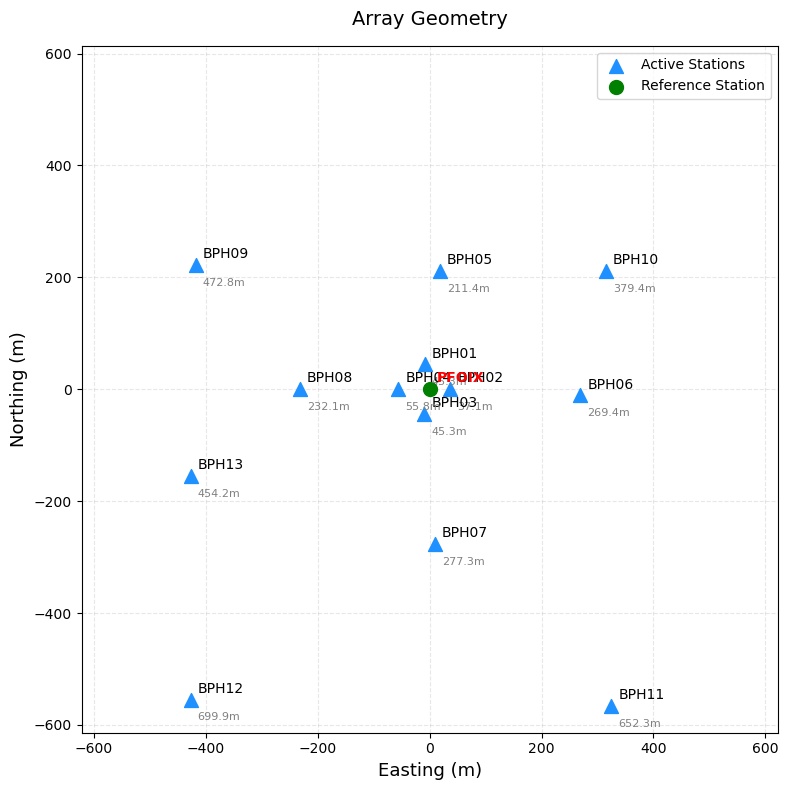

In [5]:
array.plot_array_geometry(
    show_dropped=True,
    # save_path='./figures/array_geometry.png'
    )

## 5. Check Array Distance and Frequency Range


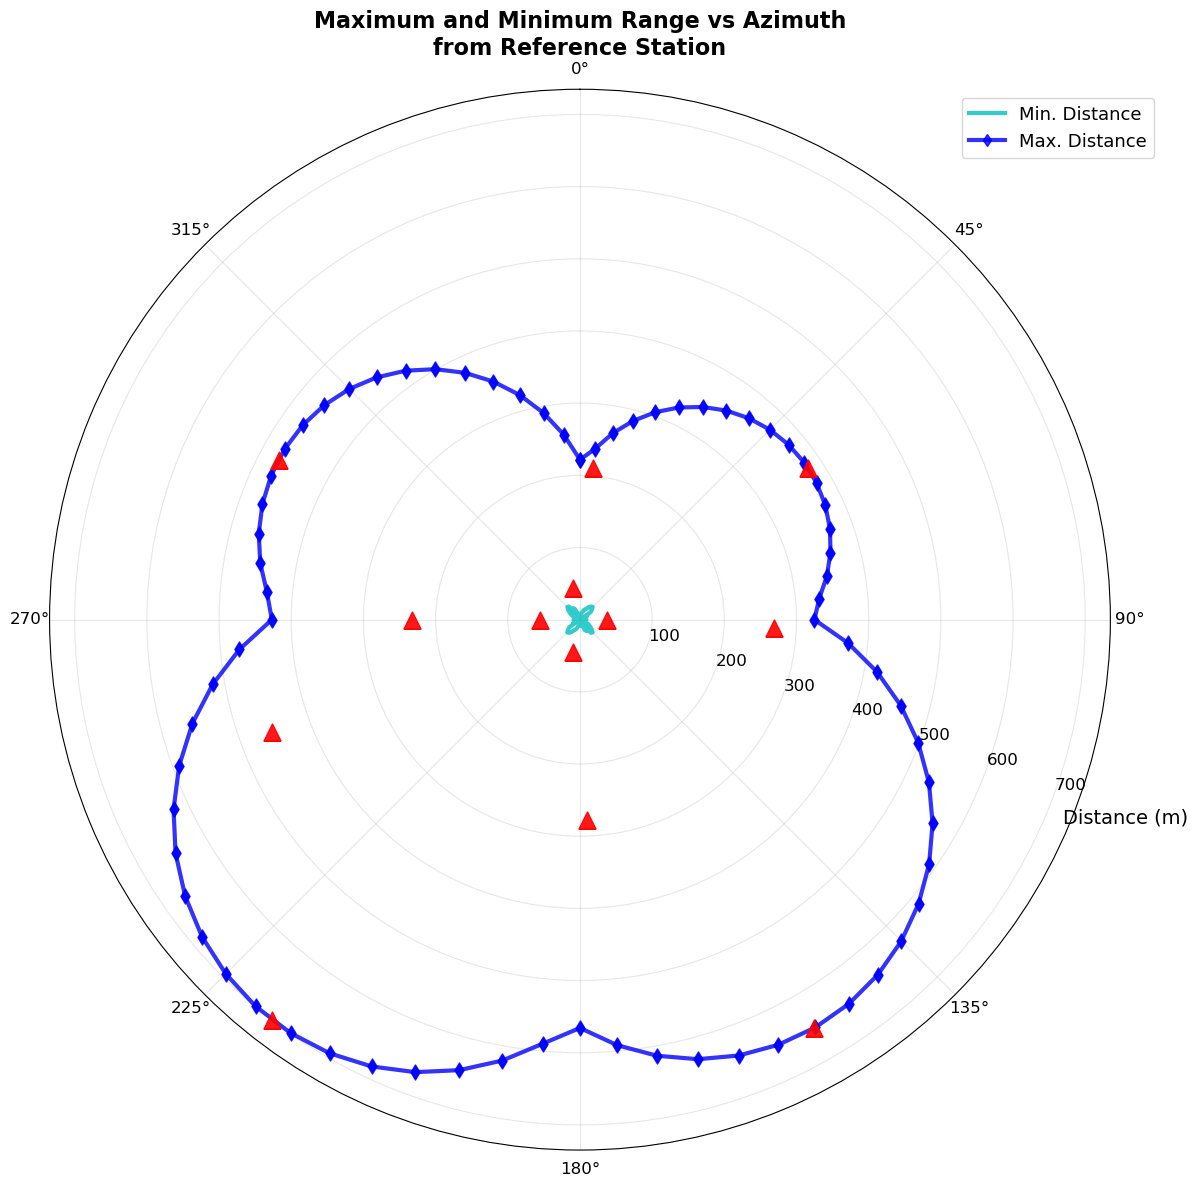

In [6]:

# Compute azimuth distance range
results = array.compute_azimuth_distance_range(
    azimuth_step=5.0,  # 5-degree steps
    show_station_labels=False,
)


In [7]:
# Convert to frequencies
freq_results = array.convert_distances_to_frequencies(
    apparent_velocity=3000.0,
    optional_amplitude_uncertainty=0.01
)

# Access different bounds
print("Optimistic fmin:", freq_results['fmin_optimistic'], " Hz")
print("Optimistic fmax:", freq_results['fmax_optimistic'], " Hz")
print("Conservative fmin:", freq_results['fmin_conservative'], " Hz")
print("Conservative fmax:", freq_results['fmax_conservative'], " Hz")

Optimistic fmin: 0.04  Hz
Optimistic fmax: 3.38  Hz
Conservative fmin: 0.14  Hz
Conservative fmax: 1.07  Hz


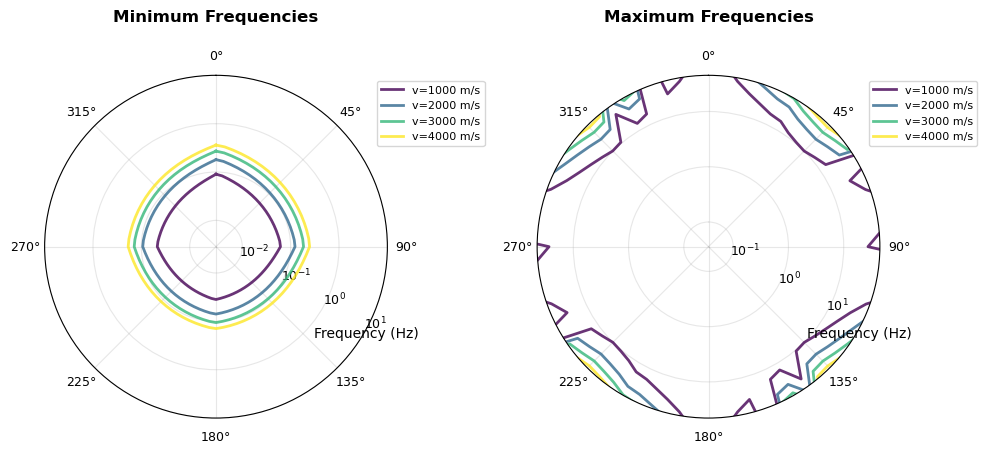

In [8]:
array.plot_frequency_limits(velocity_range=[1000, 2000, 3000, 4000],)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create dense velocity array
velocity_range = np.linspace(500, 5000, 50)  # 50 velocities from 500 to 5000 m/s
amplitude_uncertainty = 0.01

print(f"Computing frequency limits for {len(velocity_range)} velocities...")
print(f"Velocity range: {velocity_range[0]:.0f} to {velocity_range[-1]:.0f} m/s")
print(f"Amplitude uncertainty: {amplitude_uncertainty}")

# Compute frequency limits for each velocity
fmin_optimistic_list = []
fmax_optimistic_list = []
fmin_conservative_list = []
fmax_conservative_list = []

for vel in velocity_range:
    freq_results = array.convert_distances_to_frequencies(
        apparent_velocity=vel,
        optional_amplitude_uncertainty=amplitude_uncertainty
    )
    
    fmin_optimistic_list.append(freq_results['fmin_optimistic'])
    fmax_optimistic_list.append(freq_results['fmax_optimistic'])
    fmin_conservative_list.append(freq_results['fmin_conservative'])
    fmax_conservative_list.append(freq_results['fmax_conservative'])

# Convert to numpy arrays
fmin_optimistic = np.array(fmin_optimistic_list)
fmax_optimistic = np.array(fmax_optimistic_list)
fmin_conservative = np.array(fmin_conservative_list)
fmax_conservative = np.array(fmax_conservative_list)

print(f"\nFrequency ranges:")
print(f"fmin_optimistic: {np.min(fmin_optimistic):.3f} to {np.max(fmin_optimistic):.3f} Hz")
print(f"fmax_optimistic: {np.min(fmax_optimistic):.3f} to {np.max(fmax_optimistic):.3f} Hz")
print(f"fmin_conservative: {np.min(fmin_conservative):.3f} to {np.max(fmin_conservative):.3f} Hz")
print(f"fmax_conservative: {np.min(fmax_conservative):.3f} to {np.max(fmax_conservative):.3f} Hz")


Computing frequency limits for 50 velocities...
Velocity range: 500 to 5000 m/s
Amplitude uncertainty: 0.01

Frequency ranges:
fmin_optimistic: 0.010 to 0.070 Hz
fmax_optimistic: 0.560 to 5.640 Hz
fmin_conservative: 0.020 to 0.230 Hz
fmax_conservative: 0.180 to 1.790 Hz


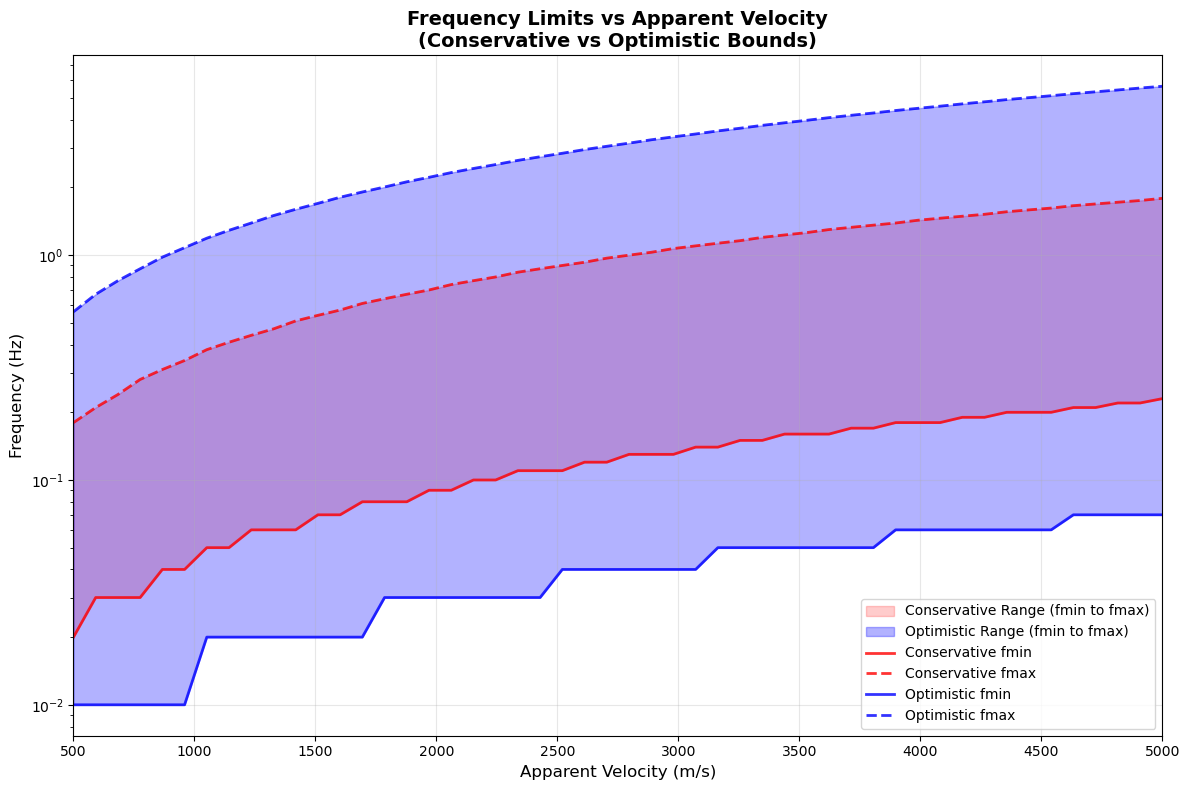


FREQUENCY LIMITS SUMMARY
Velocity range: 500 - 5000 m/s
Number of velocities: 50
Amplitude uncertainty: 0.01

Conservative bounds:
  fmin: 0.0200 - 0.2300 Hz
  fmax: 0.1800 - 1.7900 Hz

Optimistic bounds:
  fmin: 0.0100 - 0.0700 Hz
  fmax: 0.5600 - 5.6400 Hz


In [10]:
# Alternative visualization: Single plot with both fmin and fmax ranges
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot frequency ranges as filled areas
ax.fill_between(velocity_range, fmin_conservative, fmax_conservative, 
                alpha=0.2, color='red', label='Conservative Range (fmin to fmax)')
ax.fill_between(velocity_range, fmin_optimistic, fmax_optimistic, 
                alpha=0.3, color='blue', label='Optimistic Range (fmin to fmax)')

# Add boundary lines
ax.plot(velocity_range, fmin_conservative, 'r-', linewidth=2, alpha=0.8, label='Conservative fmin')
ax.plot(velocity_range, fmax_conservative, 'r--', linewidth=2, alpha=0.8, label='Conservative fmax')
ax.plot(velocity_range, fmin_optimistic, 'b-', linewidth=2, alpha=0.8, label='Optimistic fmin')
ax.plot(velocity_range, fmax_optimistic, 'b--', linewidth=2, alpha=0.8, label='Optimistic fmax')

# Add some reference velocities
reference_velocities = [1000, 2000, 3000, 4000]
for vel in reference_velocities:
    if vel in velocity_range:
        idx = np.where(velocity_range == vel)[0][0]
        ax.axvline(x=vel, color='gray', linestyle=':', alpha=0.7)
        ax.text(vel, ax.get_ylim()[1] * 0.9, f'{vel} m/s', 
                rotation=90, ha='right', va='top', fontsize=9, alpha=0.7)

ax.set_xlabel('Apparent Velocity (m/s)', fontsize=12)
ax.set_ylabel('Frequency (Hz)', fontsize=12)
ax.set_title('Frequency Limits vs Apparent Velocity\n(Conservative vs Optimistic Bounds)', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right')
ax.set_xlim(velocity_range[0], velocity_range[-1])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("FREQUENCY LIMITS SUMMARY")
print("="*60)
print(f"Velocity range: {velocity_range[0]:.0f} - {velocity_range[-1]:.0f} m/s")
print(f"Number of velocities: {len(velocity_range)}")
print(f"Amplitude uncertainty: {amplitude_uncertainty}")
print("\nConservative bounds:")
print(f"  fmin: {np.min(fmin_conservative):.4f} - {np.max(fmin_conservative):.4f} Hz")
print(f"  fmax: {np.min(fmax_conservative):.4f} - {np.max(fmax_conservative):.4f} Hz")
print("\nOptimistic bounds:")
print(f"  fmin: {np.min(fmin_optimistic):.4f} - {np.max(fmin_optimistic):.4f} Hz")
print(f"  fmax: {np.min(fmax_optimistic):.4f} - {np.max(fmax_optimistic):.4f} Hz")
print("="*60)
